<a href="https://colab.research.google.com/github/kserdem/WithKeras_StepbyStep_FaceMask_Detect_Project/blob/main/withkeras_facemask_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense,Dropout
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization
from keras import *
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.convolutional import Conv2D

import matplotlib.pyplot as plt


# Görüntünün nasıl okunduğunun boyutlandırılmadan önce boyutunun ve resize işleminden sonraki boyutunun gözlemlenmesi.

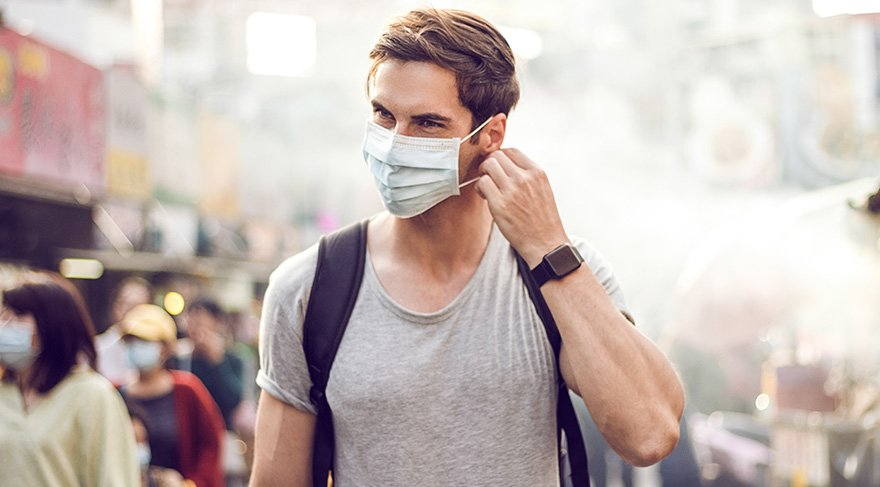

In [ ]:

img = cv2.imread('/content/drive/MyDrive/Face_Mask_Project_Keras/mask_face/1.jpg')
cv2_imshow(img)


In [ ]:
img.shape

(487, 880, 3)

In [ ]:
resize_img= cv2.resize(img,(224,224))

In [ ]:
resize_img.shape

(224, 224, 3)

#Projenin Amacı 



*   Proje Baştan sona adım adım veri toplama, işleme ve modellemeyi açıklayarak uygulama yapmak amacıyla yapılmıştır.
*   Model eğitiminde kullanılmak amacıyla googledan gelişi güzel 30 maskeli insan yüzü 30 maskesiz insan yüzü ve model eğitiminden sonra validation yapmak için aynı şekilde 6 maskeli 6 maskesiz yüz kullanıldı.


*   Model eğitildikten sonra test amacıyla 6 fotoğraf kullanıldı.
*   Tüm fotoğraflar etiiketlendi, yeniden boyutlandırıldı daha sonra modelleme işlemi yapıldı.







##Dosya Kaynağından Görüntülerin Alınması
 *Elimizde birden fazla fotoğraf olduğu için her seferinde aynı işlemi tekrar 
etmemek adına bir fonksiyon  yazalım.*

*Bu fonksiyon dosya adını verdiğimizde cv2.imread ile görüntünün okunmasını sağlayacak*

In [2]:
def get_img(filename):
  img=cv2.imread("%s"%filename)
  return img

#Alınan Fotoğafların Boyutunun Ayarlanması


> Projede ya da iş düzeninde kullanacığımız görüntüler çoğunlukla aynı boyutta olmazlar ve bu durum model eğitiminde bize sorun yaratır. Bu amaçla her fotoğraf 224,224 pixel olacak şekilde yeniden boyutlandırıldı ve yeni boyutlandırılmış halleri input_variable da array olarak eklendi. Model katmanları oluşturulduktan sonra model.fit aşamasında görüntülerin boyutlandırılmış halleri verilecek.



In [3]:
input_variable= np.array([])

for i in range(60):
  sent_img=0
  i=i+1
  path= '/content/drive/MyDrive/Face_Mask_Project_Keras/mask_face/%s.jpg'%i
  sent_img = get_img(path)

  resize_img= cv2.resize(sent_img,(224,224))
  print(input_variable)
  input_variable=np.append(input_variable,resize_img)
  print(i+1)

[]
2
[212. 209. 211. ... 107. 107. 116.]
3
[212. 209. 211. ...  36.  32.  27.]
4
[212. 209. 211. ... 220. 216. 216.]
5
[212. 209. 211. ...  34.  74. 116.]
6
[212. 209. 211. ... 131.  87.  50.]
7
[212. 209. 211. ... 239. 221. 220.]
8
[212. 209. 211. ...   2.   4.  28.]
9
[212. 209. 211. ...  46.  75.  66.]
10
[212. 209. 211. ...  22.  22.  22.]
11
[212. 209. 211. ... 133. 143. 143.]
12
[212. 209. 211. ...   0.   0.   0.]
13
[212. 209. 211. ...  50.  79.  63.]
14
[212. 209. 211. ...  29.  45.  51.]
15
[212. 209. 211. ... 223. 201. 166.]
16
[212. 209. 211. ...  19.  25.  30.]
17
[212. 209. 211. ... 234. 238. 239.]
18
[212. 209. 211. ...  88.  96.  96.]
19
[212. 209. 211. ... 171. 191. 216.]
20
[212. 209. 211. ... 170. 168. 167.]
21
[212. 209. 211. ... 235. 229. 230.]
22
[212. 209. 211. ... 124. 117. 108.]
23
[212. 209. 211. ... 108.  94.  98.]
24
[212. 209. 211. ... 255. 255. 255.]
25
[212. 209. 211. ... 138. 226. 255.]
26
[212. 209. 211. ... 253. 253. 253.]
27
[212. 209. 211. ... 255. 25

# Reshape İşlemi


*   input_variable değişkeninin shape ini düzenledik. Düzenleme işleminde kullanılan -1 yapılan değişikliğin tüm veriseti üzerinde yapılmasını ifade eder. Biz 60 veri kullandık -1 yerine 60 da yazabilirdik ancak verisetinde kaç eleman olduğunu bilmediğimiz durumlarda '-1' diyerek tüm elemanlar üzerinde işlem yapabiliriz.
*   Görüntülerimizin tamamı 224,224,3 olarak yeniden şekillendirildi ve kaydedildi. Burada bulunan 3 görüntünün 3 katmandan RGB oluştuğunu belirtir.


*   Son olarak bu proje aşamasında kullanılmadı ancak örnek olması açısından farklı projelerdede aynı input_variable'ın kullanılması için "np.save" diyerek girdi değişkenimiz olan arrayi kaydedip kullanabiliriz. 






In [4]:
input_variable= np.reshape(input_variable,(-1,224,224,3))
np.save('my_input_variable',input_variable)

* Model girdi değişkenimizi yapılan değişikliklerden sonra kontrol ettiğimizde elimizde artık 60 adet 224,224,3 boyutlu görüntü olduğunu gözlemliyoruz.

In [5]:
print(input_variable.shape)

(60, 224, 224, 3)


#Verilerin Etiketlenmesi

* Model eğitimi sırasında her görüntüye denk gelecek bir çıktı sınıfı gerekir. Bu çıktı sınıfı modelin hangi görüntüye hangi sınıf çıktısını vereceğini öğrenmesini sağlar.
* İnternet ortamından topladığımız görüntüleri yine array olarak 1-30 arasındaki görüntüler [1,0] 'Maskeli' ve [0,1] 'Maskesiz' olarak etiketledik.
* Bu işlem aslında makina öğrenmesinde sıklıkla kullanılan label encoder işlemine denk gelir. Kafamızda böyle canlandırabiliriz.

In [6]:
output_variable= np.array([[1,0],[1,0],[1,0],[1,0],[1,0],
                           [1,0],[1,0],[1,0],[1,0],[1,0],
                           [1,0],[1,0],[1,0],[1,0],[1,0],
                           [1,0],[1,0],[1,0],[1,0],[1,0],
                           [1,0],[1,0],[1,0],[1,0],[1,0],
                           [1,0],[1,0],[1,0],[1,0],[1,0],
                           [0,1],[0,1],[0,1],[0,1],[0,1],
                           [0,1],[0,1],[0,1],[0,1],[0,1],
                           [0,1],[0,1],[0,1],[0,1],[0,1],
                           [0,1],[0,1],[0,1],[0,1],[0,1],
                           [0,1],[0,1],[0,1],[0,1],[0,1],
                           [0,1],[0,1],[0,1],[0,1],[0,1]])

* 60 tane iki sınıflı çıktımızı elde ettik.

In [7]:
print(output_variable.shape)

(60, 2)


# Model Eğitiminden Sonra Validation Setimizle Model Doğrulaması İçin Validation Setinin Düzenlenlenmesi
* Bu aşamada input_variable'a yapılan işlemler validation görüntülerinede uygulandı.

In [8]:
validation_input= np.array([])

for i in range(12):
  sent_img=0
  i=i+1
  path= '/content/drive/MyDrive/Face_Mask_Project_Keras/validation_face/%s.jpg'%i
  sent_img = get_img(path)

  resize_img= cv2.resize(sent_img,(224,224))
  print(validation_input)
  validation_input=np.append(validation_input,resize_img)
  print(i+1)

[]
2
[255. 255. 255. ... 255. 255. 255.]
3
[255. 255. 255. ... 195. 184.  40.]
4
[255. 255. 255. ... 250. 236. 214.]
5
[255. 255. 255. ...  30.  31.  31.]
6
[255. 255. 255. ... 247. 205. 140.]
7
[255. 255. 255. ... 255. 255. 255.]
8
[255. 255. 255. ...  63.  57.  92.]
9
[255. 255. 255. ...  26.  16.  58.]
10
[255. 255. 255. ... 214. 230. 249.]
11
[255. 255. 255. ... 246. 238. 231.]
12
[255. 255. 255. ...   8.   0.   5.]
13


In [9]:
validation_input= np.reshape(validation_input,(-1,224,224,3))
print(validation_input.shape)

(12, 224, 224, 3)


In [10]:
validation_output=np.array([[1,0],[1,0],[1,0],[1,0],[1,0],[1,0],
                            [0,1],[0,1],[0,1],[0,1],[0,1],[0,1]])
print(validation_output.shape)

(12, 2)


#Modeli Kurmaya Başlayabiliriz
* **Conv2D** görüntüler için kullanılır.
* **kernel_size** konvolüsyon yapan çekirdeğin boyutunu ifade eder.
* *Konvolüsyon* bir çekirdek matrisinin görüntü üzerindeki pixellerle kaydırma ve çarpma işlemidir.
* **activation** modelin veri setini doğru öğrenebilmesi için gereken fonksiyon.
* **MaxPooling** bir ortaklama işlemidir burada temel amaç boyut azaltmaktır.
* **Dropout** modelin overfitting olmaması için uygulanan nöronların bir kısmının unutulması için tanımlanır.
* **Dense** modelde katman sayısını ifade eder.
* **Flatten** giriş katmanını düzgünleştirmek için kullanılır.


> Modelin en son aşamasında activation 'sigmoid' olarak verdik çünkü sigmoid fonksiyonu 0-1 arasında değerler alır ve genelde sınıflama problemlerinde kullanılır.



In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(224,224,3)))

 
model.add(Conv2D(64, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))


model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.3))


model.add(Flatten())


model.add(Dense(256, activation='relu'))

model.add(Dropout(0.2))


model.add(Dense(2, activation='sigmoid'))


In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 128)      

# Modelin Derlenmesi (Compile)

In [31]:
model.compile(loss ='categorical_crossentropy' ,
             optimizer = optimizers.Adam(),
             metrics = ['accuracy'])


**!! DİKKAT !!**

* Model fit aşamasında dikkat etmemiz gereken bir nokta input olarak verilen değişkenin /255 ile standartlaştırılması işlemidir. Bu işlem öncesinde veya model fit edilirken yappılabilir. Bilgisayarı yormamak daha hızlı sonuçlar almak için yapılması tavsiye edilir.
* Bir diğer önemli nokta ise batch_size belirlemedir. Batch size model eğitiminde görüntülerin modele kaçar kaçar verileceğini ifade eder. batch_size'da belirttiğimiz sayı büyüdükçe model daha genellenebilir (gerçek hayata entegre edildiğinde daha kullanışlı) olur. 

**NOT:** Bu durum projelere ve kullanılan veri setine göre değişkenlik gösterebilir.


In [32]:
history= model.fit(input_variable/255,output_variable,batch_size=4,epochs=15,validation_data=(validation_input,validation_output))

Epoch 1/15
15/15 [==============================] - 2s 52ms/step - loss: 7.6939 - accuracy: 0.5785 - val_loss: 10.5970 - val_accuracy: 0.6667
Epoch 2/15
15/15 [==============================] - 1s 42ms/step - loss: 0.7456 - accuracy: 0.5924 - val_loss: 1.5614 - val_accuracy: 0.4167
Epoch 3/15
15/15 [==============================] - 1s 42ms/step - loss: 0.6191 - accuracy: 0.6564 - val_loss: 5.0366 - val_accuracy: 0.6667
Epoch 4/15
15/15 [==============================] - 1s 42ms/step - loss: 0.4881 - accuracy: 0.8069 - val_loss: 23.6464 - val_accuracy: 0.4167
Epoch 5/15
15/15 [==============================] - 1s 42ms/step - loss: 0.3163 - accuracy: 0.9032 - val_loss: 327.9262 - val_accuracy: 0.5000
Epoch 6/15
15/15 [==============================] - 1s 42ms/step - loss: 0.1253 - accuracy: 0.9424 - val_loss: 81.7789 - val_accuracy: 0.6667
Epoch 7/15
15/15 [==============================] - 1s 42ms/step - loss: 0.2638 - accuracy: 0.8887 - val_loss: 118.6012 - val_accuracy: 0.5833
Epoch 

#Sonuçların Göreselleştirilmesi

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [34]:
print(acc, 'Eğitim Başarıları')

[0.6000000238418579, 0.6000000238418579, 0.699999988079071, 0.8333333134651184, 0.9166666865348816, 0.9333333373069763, 0.8999999761581421, 0.949999988079071, 0.9666666388511658, 0.9666666388511658, 0.9666666388511658, 1.0, 0.9833333492279053, 0.9666666388511658, 1.0] Eğitim Başarıları


In [35]:
epochs = range(1, len(acc) + 1)

#YORUM
* Veri setimiz az sayıda görüntüden oluştuğu için model overfitting olmuş gibi gözüküyor. Yani modelimiz input_variable (eğitim görüntülerimiz) için çok iyi öğrendi ancak validation için aynı başarıyı yakalayamadı.

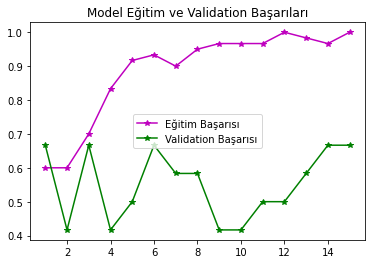

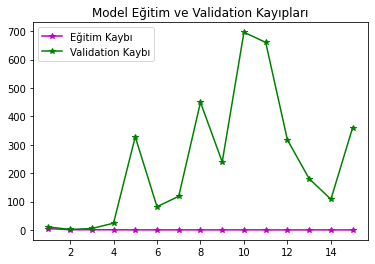

In [37]:
plt.plot(epochs, acc, 'm*-', label= 'Eğitim Başarısı')
plt.plot(epochs, val_acc, 'g*-', label= 'Validation Başarısı')
plt.title('Model Eğitim ve Validation Başarıları')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label= 'Validation Kaybı')
plt.title('Model Eğitim ve Validation Kayıpları')
plt. legend()

plt.show()

# Kurulan Modelin Daha Sonra Kullanılmak Üzere Kaydedilmesi
* Daha sonra kullanmak için load_model diyerek modeli yükleyip direk elimizdeki veri setine uygulayabiliriz.

In [38]:
model.save('keras_face_mask')

INFO:tensorflow:Assets written to: keras_face_mask/assets


#Modelin Test Edilmesi
* Validation ve input değişkenlerimize yapılan işlemleri test görüntülerinede uyguladık.

**Hatırlatma:** [1,0] çıktısı maskeli yüzleri, [0,1] çıktısı maskesiz yüzleri temsil ediyordu.

[]
2


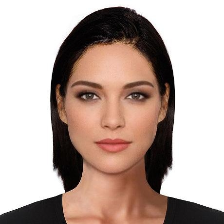

[255. 255. 255. ...  29.  29.  29.]
3


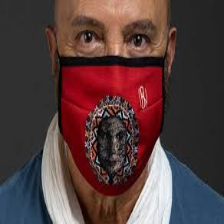

[255. 255. 255. ... 104.  75.  48.]
4


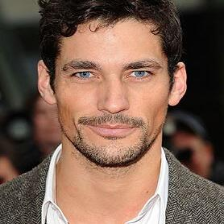

[255. 255. 255. ...  77.  84.  87.]
5


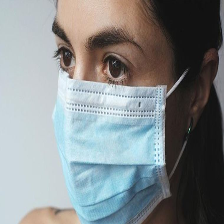

[255. 255. 255. ...  23.  23.  23.]
6


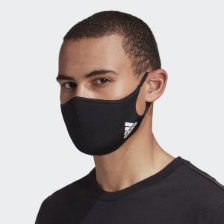

In [39]:
test_variable=np.array([])
for i in range(5):
  sent_img=0
  i=i+1
  path= '/content/drive/MyDrive/Face_Mask_Project_Keras/%s.jpg'%i
  sent_img = get_img(path)

  resize_img= cv2.resize(sent_img,(224,224))
  print(test_variable)
  test_variable=np.append(test_variable,resize_img)
  print(i+1)
  cv2_imshow(resize_img)
  

In [40]:
test_variable= np.reshape(test_variable,(-1,224,224,3))
print(test_variable.shape)

(5, 224, 224, 3)


#YORUM
Test görüntülerine göre model yalnızca son görüntüyü yanlış tahmin etti. Maskeli görüntü için [1,0] çıktısı vermesi gerekirdi ancak [0,1] tahmini yaptı. 6 test görüntüsü için model başarısı %83.

In [45]:
model.predict(test_variable).astype(int)

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1]])